# Business Problem

#### 1)How many hours needs to do the study to get 99% marks? 
#### 2)How many hours needs to do the studyb to pass the exam?
#### 3)If a student does study X(5) hours per day so how much marks he/she will gets? 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Load Dataset
df = pd.read_csv('student_info.csv')

In [4]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [6]:
df.shape

(200, 2)

In [7]:
# To gain information from the insights of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
study_hours      195 non-null float64
student_marks    200 non-null float64
dtypes: float64(2)
memory usage: 3.2 KB


In [8]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


### Visualization of the data 

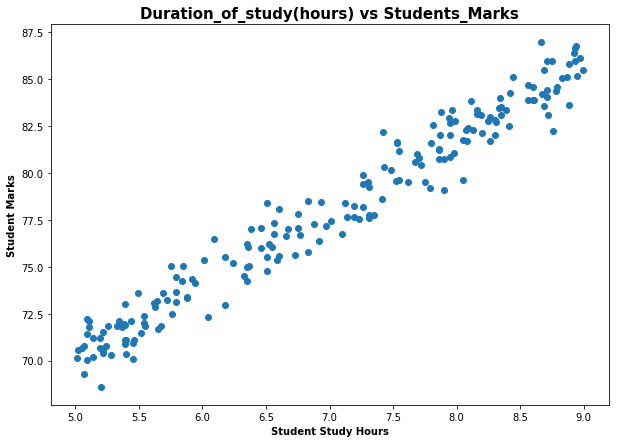

In [13]:
plt.figure(figsize=(10,7))
plt.scatter(x = df.study_hours, y = df.student_marks)
plt.xlabel('Student Study Hours',fontweight = 'bold')
plt.ylabel('Student Marks',fontweight = 'bold')
plt.title('Duration_of_study(hours) vs Students_Marks',fontsize = 15,fontweight = 'bold')
plt.show()

### Prepare the data for ML model

In [14]:
#Let's clean the data
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [15]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [16]:
new_df = df.fillna(df.mean())

In [17]:
new_df.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [18]:
new_df.head(10)

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19
5,7.550000,81.18
6,6.670000,76.99
7,8.990000,85.46
8,5.190000,70.66
9,6.750000,77.82


### Split the dataset

In [58]:
X = new_df.drop('student_marks',axis = 1)
y = new_df.drop('study_hours',axis = 1)
print('Shape of X = ',X.shape)
print('Shape of y = ',y.shape)

Shape of X =  (200, 1)
Shape of y =  (200, 1)


In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 60)

In [60]:
print('Shape of X_train = ',X_train.shape)
print('Shape of y_train = ',y_train.shape)
print('Shape of X_test = ',X_test.shape)
print('Shape of y_test = ',y_test.shape)

Shape of X_train =  (160, 1)
Shape of y_train =  (160, 1)
Shape of X_test =  (40, 1)
Shape of y_test =  (40, 1)


### Select the model and train it

In [61]:
# y = m*x+c
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [62]:
print(lr.coef_)
print(lr.intercept_)

[[3.8847532]]
[50.76613651]


In [63]:
m = 3.94023954
c = 50.42395416
y = m*4+c
print('Student Marks = ',y)

Student Marks =  66.18491232


In [64]:
lr.predict([[4]])

array([[66.30514932]])

In [65]:
#Let's test the Model
pd.DataFrame(np.c_[X_test,y_test,lr.predict(X_test)],columns =['study_hours','student_original_marks','student_predicted_marks'])

,study_hours,student_original_marks,student_predicted_marks
0,8.05,81.74,82.038400
1,8.71,84.44,84.602337
2,8.11,83.82,82.271485
3,8.93,85.96,85.456983
4,8.78,84.35,84.874270
5,6.83,78.50,77.299001
6,5.52,71.45,72.209974
7,7.94,82.93,81.611077
8,6.52,76.20,76.094727
9,6.83,75.80,77.299001


### Find tune of the Model

In [66]:
lr.score(X_test,y_test)

0.9591813288876931

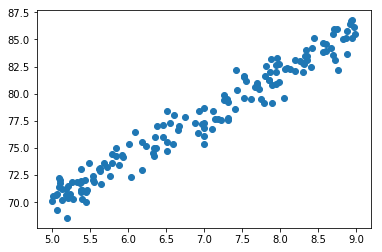

In [67]:
plt.scatter(X_train,y_train)

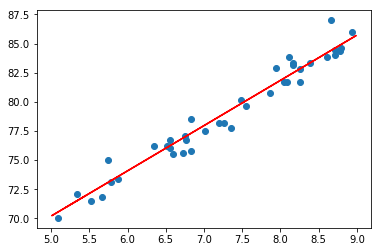

In [68]:
#Visualization of the predicted values
plt.scatter(X_test,y_test)
plt.plot(X_train,lr.predict(X_train),color = 'red')

### Present the solution

In [69]:
#Save ML Model
from sklearn.externals import joblib
joblib.dump(lr,'Students_Marks_Predictor_model.pkl')

['Students_Marks_Predictor_model.pkl']

In [70]:
model = joblib.load('Students_Marks_Predictor_model.pkl')

In [73]:
model.predict([[6]])[0][0]

74.07465572871504